In [240]:
# !pip install standard-precip

In [241]:
import dataretrieval as dr
from standard_precip.spi import SPI as SPI_Calculator
from standard_precip.utils import plot_index
import numpy as np

In [242]:
# first import the functions for downloading data from NWIS
import dataretrieval.nwis as nwis

# specify the USGS site code for which we want data.
# We chose the Lees Ferry
site = '09382000'


# get daily values (dv)
data = nwis.get_record(sites=site, service='dv', start='1900-12-31', end='2020-01-01')
data = data.reset_index()
# data["datetime"] = data.index


# # get basic info about the site
site_info = nwis.get_record(sites=site, service='site')

In [243]:
discharge_timeseries = data["00060_Mean"]

<Axes: >

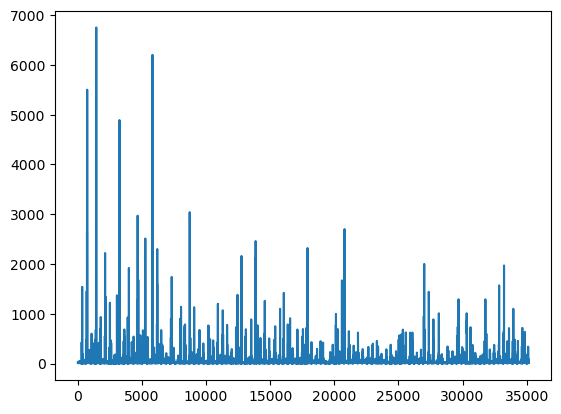

In [244]:
discharge_timeseries.plot.line()

In [245]:
spi_calculator = SPI_Calculator()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35157 entries, 0 to 35156
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   datetime       35157 non-null  datetime64[ns, UTC]
 1   site_no        35157 non-null  object             
 2   00060_Mean     35157 non-null  float64            
 3   00060_Mean_cd  35157 non-null  object             
 4   80154_Mean     11297 non-null  float64            
 5   80154_Mean_cd  11297 non-null  object             
 6   80155_Mean     11297 non-null  float64            
 7   80155_Mean_cd  11297 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(3), object(4)
memory usage: 2.1+ MB


In [246]:
spi = spi_calculator.calculate(
    data, 
    'datetime', 
    '00060_Mean', 
    freq="M", 
    scale=12*50, 
    fit_type="lmom", 
    dist_type="pe3"
)
spi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35157 entries, 0 to 35156
Data columns (total 3 columns):
 #   Column                                 Non-Null Count  Dtype              
---  ------                                 --------------  -----              
 0   datetime                               35157 non-null  datetime64[ns, UTC]
 1   00060_Mean_scale_600                   34558 non-null  float64            
 2   00060_Mean_scale_600_calculated_index  34503 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2)
memory usage: 824.1 KB


<Axes: xlabel='datetime'>

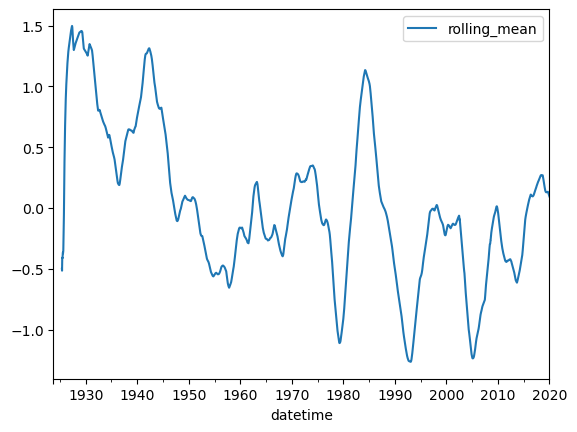

In [247]:
spi['rolling_mean'] = spi['00060_Mean_scale_600_calculated_index'].rolling(365*5, min_periods=1).apply(np.mean)
spi.plot(x="datetime", y = "rolling_mean")


<Axes: xlabel='datetime'>

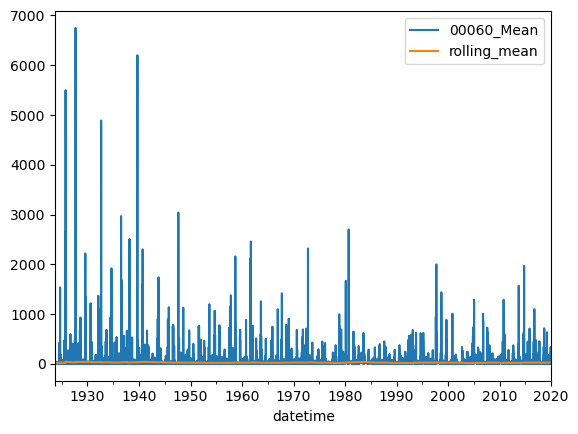

In [255]:
data['rolling_mean'] = data['00060_Mean'].rolling(365*5, min_periods=1).apply(np.mean)
data.plot(x="datetime", y = ['00060_Mean', "rolling_mean"])

In [249]:
spi["rolling_mean"].isnull().sum()

599